## 矩陣

1. 矩阵是numpy.matrix类类型的对象，该类继承自numpy.ndarray，任何针对多维数组的操作，对矩阵同样有效，但是作为子类矩阵又结合其自身的特点，做了必要的扩充，比如：乘法计算、求逆等。


2. 矩阵对象的创建可以通过以下三种方式：
    - `numpy.matrix(任何可被解释为矩阵的二维容器,copy=是否复制数据(缺省值为True，即复制数据))`
        - 如果copy的值为True(缺省)，所得到的矩阵对象与参数中的源容器共享同一份数据，否则，各自拥有独立的数据拷贝。
        
    - `numpy.mat(任何可被解释为矩阵的二维容器)`等价于`numpy.matrix(..., copy=False)`
        - 由该函数创建的矩阵对象与参数中的源容器一定共享数据，无法拥有独立的数据拷贝。
        
    - `numpy.bmat(拼块规则)`
        - 包含若干小矩阵数据的大矩阵，拼接规则由参数指定
        
        
3. 以上函数也可以接受字符串形式的矩阵描述：数据项通过空格分隔，数据行通过分号分隔。例如：
        '1 2 3; 4 5 6'
        / 1 2 3 \
        \ 4 5 6 /


In [11]:
#mat.py
import numpy as np
a = np.array([
    [1, 2, 6],
    [3, 5, 7],
    [4, 8, 9]])
print(a, type(a))
b = np.matrix(a)
print(b, type(b))
b += 10
print(b)
print(a)

c = np.matrix(a, copy=False)
print(c, type(c))
c += 10
print(c)
print(a)

d = np.mat(a)
print(d, type(d))
d -= 10
print(d)
print(a)

e = np.mat('1 2 6; 3 5 7; 4 8 9')
print(e)

f = np.bmat('b e')
print(f)
g = np.bmat('b e; e b')

# 多維數組的乘法：對應元素相乘
h = a * a
print('h等於\n', h)
# 矩陣相乘：乘積矩陣的第i行第j列元素等於被乘矩陣的第i行於乘數矩陣的第j列的點積
i = e * e
print('i等於\n', i)
j = e.I
print('e的逆矩陣為\n', j)
print(j * e)

k = a.dot(a) # 數組使用矩陣乘法
l = np.linalg.inv(a) # 數組使用逆矩陣

[[1 2 6]
 [3 5 7]
 [4 8 9]] <class 'numpy.ndarray'>
[[1 2 6]
 [3 5 7]
 [4 8 9]] <class 'numpy.matrixlib.defmatrix.matrix'>
[[11 12 16]
 [13 15 17]
 [14 18 19]]
[[1 2 6]
 [3 5 7]
 [4 8 9]]
[[1 2 6]
 [3 5 7]
 [4 8 9]] <class 'numpy.matrixlib.defmatrix.matrix'>
[[11 12 16]
 [13 15 17]
 [14 18 19]]
[[11 12 16]
 [13 15 17]
 [14 18 19]]
[[11 12 16]
 [13 15 17]
 [14 18 19]] <class 'numpy.matrixlib.defmatrix.matrix'>
[[1 2 6]
 [3 5 7]
 [4 8 9]]
[[1 2 6]
 [3 5 7]
 [4 8 9]]
[[1 2 6]
 [3 5 7]
 [4 8 9]]
[[11 12 16  1  2  6]
 [13 15 17  3  5  7]
 [14 18 19  4  8  9]]
h等於
 [[ 1  4 36]
 [ 9 25 49]
 [16 64 81]]
i等於
 [[ 31  60  74]
 [ 46  87 116]
 [ 64 120 161]]
e的逆矩陣為
 [[-0.73333333  2.         -1.06666667]
 [ 0.06666667 -1.          0.73333333]
 [ 0.26666667  0.         -0.06666667]]
[[ 1.00000000e+00  1.77635684e-15  3.55271368e-15]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## 通用函数
### 1. frompyfunc->ufunc对象
    def 标量函数(标量参数1, 标量参数2, ...):
        ...
        return 标量返回值1, 标量返回值2, ...
    矢量参数1
    矢量参数2
    ...
    numpy.frompyfunc(标量函数, 参数个数, 返回值个数)
        ->矢量函数 # numpy.ufunc类类型的对象，可调用对象
    矢量函数(矢量参数1, 矢量参数2, ...)
        ->矢量返回值1, 矢量返回值2

In [12]:
# ufunc.py
import numpy as np

def foo(x, y):
    return x + y, x - y, x * y

def hum(x):
    def fun(y):
        return x + y, x - y, x * y
    return np.frompyfunc(fun, 1, 1)

x, y = 1, 4
print(foo(x, y))
X, Y = np.array([1, 2, 3]), np.array([4, 5, 6])
bar = np.frompyfunc(foo, 2, 3)
print(bar(X, Y))
print(np.frompyfunc(foo, 2, 3)(X, Y))
print(hum(100)(X))

(5, -3, 4)
(array([5, 7, 9], dtype=object), array([-3, -3, -3], dtype=object), array([4, 10, 18], dtype=object))
(array([5, 7, 9], dtype=object), array([-3, -3, -3], dtype=object), array([4, 10, 18], dtype=object))
[(101, 99, 100) (102, 98, 200) (103, 97, 300)]


### 2. 加法通用函数：add
    add.reduce() - 累加和
    add.accumulate() - 累加和过程
    add.reduceat() - 分段累加和
    add.outer() - 外和

In [26]:
# add.py
a = np.arange(1, 7)
print(a)
b = a + a
print(b)

b = np.add(a, a)
print(b)

c = np.add.reduce(a)
print(c)
d = np.add.accumulate(a)
print(d)
e = np.add.reduceat(a, [0, 2, 4]) # 按照下標分段
print(e)
f = np.add.outer([10, 20, 30], a)
print(f)

g = np.outer([10, 20, 30], a) # 不加add的話是外積
print(g)

[1 2 3 4 5 6]
[ 2  4  6  8 10 12]
[ 2  4  6  8 10 12]
21
[ 1  3  6 10 15 21]
[ 3  7 11]
[[11 12 13 14 15 16]
 [21 22 23 24 25 26]
 [31 32 33 34 35 36]]
[[ 10  20  30  40  50  60]
 [ 20  40  60  80 100 120]
 [ 30  60  90 120 150 180]]


### 3. 除法通用函数
    [5 5 -5 -5]<真除>[2 -2 2 -2] = [2.5 -2.5 -2.5 2.5]
        numpy.true_divide()
        numpy.divide()
        /
        
    [5 5 -5 -5]<地板除>[2 -2 2 -2] = [2 -3 -3 2]
        numpy.floor_divide()
        //
        
    [5 5 -5 -5]<天花板除>[2 -2 2 -2] = [3 -2 -2 3]
        天花板取整(真除的结果)：numpy.ceil()
        
    [5 5 -5 -5]<截断除>[2 -2 2 -2] = [2 -2 -2 2]
        截断取整(真除的结果)：numpy.trunc()

In [27]:
# div.py
a = np.array([5, 5, -5, -5])
b = np.array([2, -2, 2, -2])
print(a, b)
# c = np.true_divide(a, b)
# c = np.divide(a, b)
c = a / b
print(c)
# d = np.floor_divide(a, b)
d = a // b
print(d)
e = np.ceil(a / b).astype(int)
print(e)
f = np.trunc(a / b).astype(int)
print(f)

[ 5  5 -5 -5] [ 2 -2  2 -2]
[ 2.5 -2.5 -2.5  2.5]
[ 2 -3 -3  2]
[ 3 -2 -2  3]
[ 2 -2 -2  2]


### 4. 取余通用函数
    被除数/除数=商...余数
    除数 * 商 + 余数 = 被除数
    
    [5 5 -5 -5]<地板除>[2 -2 2 -2] = [2 -3 -3 2]...[1 -1 1 -1]
    numpy.remainder()
    numpy.mod()
    %
    
    [5 5 -5 -5]<截断除>[2 -2 2 -2] = [2 -2 -2 2]...[1 1 -1 -1]
    numpy.fmod()

>Numpy将Python语言中针对标量的运算符，通过通用函数加以重载定义，以支持数组形式的矢量运算。

In [34]:
# fib.py
import numpy as np
n = 35

# 递归方法
# def fibo(n):
#     return 1 if n < 3 else fibo(n - 1) + fibo(n - 2)
# print(fibo(n))

# 循环换位方法
fn_1, fn_2 = 0, 1
for i in range(n):
    fn = fn_1 + fn_2
    fn_1, fn_2 = fn, fn_1
print(fn)

# 矩阵乘方
print(int((np.mat('1. 1.; 1. 0.') ** (n - 1))[0, 0]))

# 斐波那契公式
r = np.sqrt(5)
print(int((((1 + r) / 2) ** n -
           ((1 - r) / 2) ** n) / r))

9227465
9227465
9227465


### 5. Numpy中的所有三角函数都是通用函数
    x = Asin(at+pi/2)
    y = Bsin(bt)

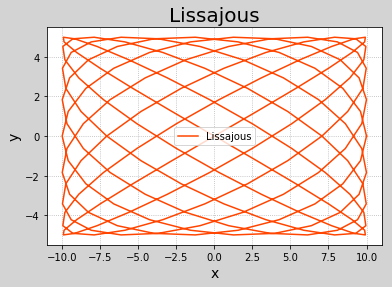

In [36]:
# lissa.py
import numpy as np
import matplotlib.pyplot as mp
t = np.linspace(0, 2 * np.pi, 201)
A, a, B, b = 10, 9, 5, 8
x = A * np.sin(a * t + np.pi / 2)
y = B * np.sin(b * t)
mp.figure('Lissajous', facecolor='lightgray')
mp.title('Lissajous', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(x, y, c='orangered', label='Lissajous')
mp.legend()
mp.show()

    y = 4/(1pi) sin(1x) 2 x 1 - 1
    y = 4/(3pi) sin(3x) 2 x 2 - 1
    y = 4/(5pi) sin(5x) 2 x 3 - 1

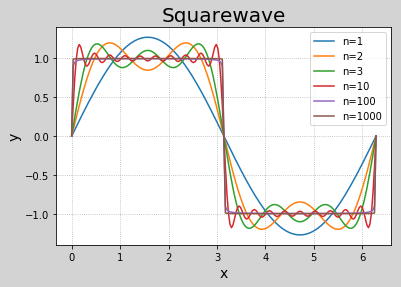

In [37]:
import numpy as np
import matplotlib.pyplot as mp


def squarewave(n):
    k = np.arange(1, n + 1)

    def fun(x):
        return np.sum(4 / ((2 * k - 1) * np.pi) *
                      np.sin((2 * k - 1) * x))

    return np.frompyfunc(fun, 1, 1)


x = np.linspace(0, 2 * np.pi, 201)
y1 = squarewave(1)(x)
y2 = squarewave(2)(x)
y3 = squarewave(3)(x)
y4 = squarewave(10)(x)
y5 = squarewave(100)(x)
y6 = squarewave(1000)(x)
mp.figure('Squarewave', facecolor='lightgray')
mp.title('Squarewave', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(x, y1, label='n=1')
mp.plot(x, y2, label='n=2')
mp.plot(x, y3, label='n=3')
mp.plot(x, y4, label='n=10')
mp.plot(x, y5, label='n=100')
mp.plot(x, y6, label='n=1000')
mp.legend()
mp.show()

### 7. 位运算通用函数
    位异或：^/__xor__/bitwise_xor
    0 ^ 0 = 0
    0 ^ 1 = 1
    1 ^ 0 = 1
    1 ^ 1 = 0
    if a^b<0 then a和b异号
    
    位与：&/__and__/bitwise_and
    0 & 0 = 0
    0 & 1 = 0
    1 & 0 = 0
    1 & 1 = 1
    
    # 判断是否为2的幂
    1  2^0 00001   0 00000
    2  2^1 00010   1 00001
    4  2^2 00100   3 00011
    8  2^3 01000   7 00111
    16 2^4 10000  15 01111
    ...
    if a & (a-1) == 0 then a是2的幂
    
    位或：|/__or__/bitwise_or
    0 | 0 = 0
    0 | 1 = 1
    1 | 0 = 1
    1 | 1 = 1

    位反：~/__not__/bitwise_not
    ~0 = 1
    ~1 = 0
    
    移位：<</__lshift__/left_shift>>/__rshift__/right_shift
    左移1位相当于乘2，右移1位相当于除2。

In [41]:
import numpy as np
a = np.array([0, -1, 2, -3, 4, -5])
b = np.array([0, 1, 2, 3, 4, 5])
print(a, b)
# c = a ^ b
# c = a.__xor__(b)
c = np.bitwise_xor(a, b)
print(c)
print(np.where(c < 0)[0])

d = np.arange(1, 21)
print(d)
# e = d & (d - 1)
# e = d.__and__(d - 1)
e = np.bitwise_and(d, d - 1)
print(e)
print(d[e == 0])


# f = d << 1
# f = d.__lshift__(1)
f = np.left_shift(d, 1)
print(f)
# g = d >> 1
# g = d.__rshift__(1)
g = np.right_shift(d, 1)
print(g)


[ 0 -1  2 -3  4 -5] [0 1 2 3 4 5]
[ 0 -2  0 -2  0 -2]
[1 3 5]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  0  2  0  4  4  6  0  8  8 10  8 12 12 14  0 16 16 18 16]
[ 1  2  4  8 16]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]
[ 0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10]


## 线性代数模块(linalg)

### 1. 逆矩阵和广义逆矩阵

- 如果一个方阵A与另一个方阵B的乘积是一个单位矩阵，那么A和B就互为逆矩阵。
        np.linalg.inv(A)->A^-1
        
- 将以上有关逆矩阵的定义推广到非方阵，则称为广义逆矩阵。
        np.linalg.pinv(A)->A^-1
        np.matrix.I -> inv/pinv

In [42]:
import numpy as np
A = np.mat('1 2 3; 8 9 4; 7 6 5')
print(A)
B = np.linalg.inv(A)
print(B)
print(A * B)
print(A.I)

C = np.mat('11 12 13 14; 20 21 22 15; 19 18 17 16')
print(C)
# D = np.linalg.inv(C)
D = np.linalg.pinv(C)
print(D)
print(C * D)
print(C.I)

E = np.mat('1 2 3; 4 5 6; 7 8 9')
print(E)
F = np.linalg.inv(E)
print(F)
print(E * F)

[[1 2 3]
 [8 9 4]
 [7 6 5]]
[[-0.4375     -0.16666667  0.39583333]
 [ 0.25        0.33333333 -0.41666667]
 [ 0.3125     -0.16666667  0.14583333]]
[[ 1.00000000e+00  2.77555756e-17 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00  1.94289029e-16  1.00000000e+00]]
[[-0.4375     -0.16666667  0.39583333]
 [ 0.25        0.33333333 -0.41666667]
 [ 0.3125     -0.16666667  0.14583333]]
[[11 12 13 14]
 [20 21 22 15]
 [19 18 17 16]]
[[-0.18055556 -0.08333333  0.23611111]
 [-0.04305556  0.04166667 -0.00138889]
 [ 0.09444444  0.16666667 -0.23888889]
 [ 0.1625     -0.125       0.0375    ]]
[[ 1.00000000e+00  2.22044605e-16 -3.33066907e-16]
 [ 1.77635684e-15  1.00000000e+00 -1.88737914e-15]
 [ 1.77635684e-15  8.88178420e-16  1.00000000e+00]]
[[-0.18055556 -0.08333333  0.23611111]
 [-0.04305556  0.04166667 -0.00138889]
 [ 0.09444444  0.16666667 -0.23888889]
 [ 0.1625     -0.125       0.0375    ]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3.15251974e+15 -6.30503948e+15  3.152

### 2. 解线性方程组
$$
\left( \begin{array}{l}
x - 2y + z = 0\\
2y - 8z - 8 = 0\\
 - 4x + 5y + 9z + 9 = 0
\end{array} \right.
$$
   
$$
\left( \begin{array}{l}
1x +  - 2y + 1z = 0\\
0x + 2y +  - 8z = 8\\
 - 4x + 5y + 9z =  - 9
\end{array} \right.
$$

$$
\left( {\begin{array}{*{20}{c}}
1&{ - 2}&1\\
0&2&{ - 8}\\
{ - 4}&5&9
\end{array}} \right) \times \left( {\begin{array}{*{20}{c}}
x\\
y\\
z
\end{array}} \right) = \left( {\begin{array}{*{20}{c}}
0\\
8\\
{ - 9}
\end{array}} \right)
$$

                           a                x           b
                             = np.linalg.lstsq(a, b)[0] -> 拟合
                             = np.linalg.solve(a, b) -> 解

In [43]:
import numpy as np
a = np.mat('1 -2 1; 0 2 -8; -4 5 9')
b = np.mat('0; 8; -9')
x = np.linalg.solve(a, b)
print(x)
x = np.linalg.lstsq(a, b)[0]
print(x)

[[29.]
 [16.]
 [ 3.]]
[[29.]
 [16.]
 [ 3.]]


/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


### 3. 特征值和特征向量
- 对于n阶方阵A，如果存在数a和非零n维列向量x，使得Ax=ax，则称a是矩阵A的一个特征值，x是矩阵A属于特征值a的特征向量
        np.linalg.eig(A) -> 特征值数组，特征向量数组
                                 [a1       a2]
                                [[x11     x12]
                                [x21     x22]]

In [44]:
import numpy as np
A = np.mat('3 -2; 1 0')
print(A)
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)
print(eigvecs)
print(A * eigvecs[:, 0])
print(eigvals[0] * eigvecs[:, 0])
print(A * eigvecs[:, 1])
print(eigvals[1] * eigvecs[:, 1])

[[ 3 -2]
 [ 1  0]]
[2. 1.]
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
[[1.78885438]
 [0.89442719]]
[[1.78885438]
 [0.89442719]]
[[0.70710678]
 [0.70710678]]
[[0.70710678]
 [0.70710678]]


### 4. 奇异值分解

- 主对角线上的元素称为矩阵M的奇异值，其它元素均为0
                    |
            M = U x S x V
                |       |
                 正交矩阵
          UxU^T = E = VxV^T
        np.linalg.svd(M, full_matrices=False)-> U, 奇异值, V

In [45]:
import numpy as np
M = np.mat('4 11 14; 8 7 -2')
print(M)
U, sv, V = np.linalg.svd(M, full_matrices=False)
print(U * U.T)
print(V * V.T)
print(sv)
S = np.diag(sv)
print(S)
print(U * S * V)

[[ 4 11 14]
 [ 8  7 -2]]
[[1.0000000e+00 3.2123061e-17]
 [3.2123061e-17 1.0000000e+00]]
[[ 1.00000000e+00 -6.16790569e-18]
 [-6.16790569e-18  1.00000000e+00]]
[18.97366596  9.48683298]
[[18.97366596  0.        ]
 [ 0.          9.48683298]]
[[ 4. 11. 14.]
 [ 8.  7. -2.]]


### 5. 行列式
    np.det(方阵)->行列式的值

In [46]:
import numpy as np
A = np.mat('2 1; 3 4')
print(A)
print(np.linalg.det(A))
B = np.mat('3 2 1; 4 9 8; 5 6 7')
print(B)
print(np.linalg.det(B))

[[2 1]
 [3 4]]
5.000000000000001
[[3 2 1]
 [4 9 8]
 [5 6 7]]
47.999999999999986


## 快速傅里叶变换模块(fft)
- 原函数：y = f(x) - 时间/空间域函数
- 一系列正弦函数的叠加
        y = A1sin(w1x+fai1) + A2sin(w2x+fai2) + ... + Ansin(wnx+fain) + R
        n->oo: R->0
        [x1, x2, ..., xn]->[y1, y2, ..., yn]
        
        w1->A1, fai1 \
        w2->A2, fai2  | A,fai = f'(w) - 频率域函数
        ...                      |
        wn->An, fain /
          f(x) -傅里叶变换-> f'(w)
        时空域                     频率域
          f(x) <-反傅里叶变换- f'(w)
        时空域                         频率域
        np.fft.fftfreq(采样数, 采样周期)->频率序列
        np.fft.fft(原函数值序列) -> 目标函数值序列(复数)
        复数的模反映了振幅A，辐角反映了初相位fai
        np.fft.ifft(目标函数值序列(复数))->原函数值序列

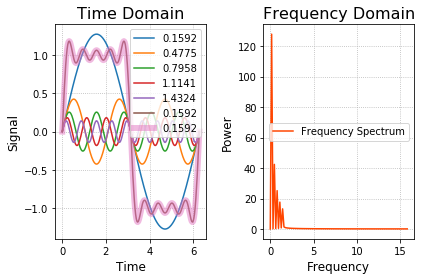

In [47]:
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as mp
times = np.linspace(0, 2 * np.pi, 201)
sigs1 = 4 / (1 * np.pi) * np.sin(1 * times)
sigs2 = 4 / (3 * np.pi) * np.sin(3 * times)
sigs3 = 4 / (5 * np.pi) * np.sin(5 * times)
sigs4 = 4 / (7 * np.pi) * np.sin(7 * times)
sigs5 = 4 / (9 * np.pi) * np.sin(9 * times)
sigs6 = sigs1 + sigs2 + sigs3 + sigs4 + sigs5
freqs = nf.fftfreq(times.size, times[1] - times[0])
ffts = nf.fft(sigs6)
pows = np.abs(ffts)
sigs7 = nf.ifft(ffts).real
mp.subplot(121)
mp.title('Time Domain', fontsize=16)
mp.xlabel('Time', fontsize=12)
mp.ylabel('Signal', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(times, sigs1, label='{:.4f}'.format(
        1 / (2 * np.pi)))
mp.plot(times, sigs2, label='{:.4f}'.format(
        3 / (2 * np.pi)))
mp.plot(times, sigs3, label='{:.4f}'.format(
        5 / (2 * np.pi)))
mp.plot(times, sigs4, label='{:.4f}'.format(
        7 / (2 * np.pi)))
mp.plot(times, sigs5, label='{:.4f}'.format(
        9 / (2 * np.pi)))
mp.plot(times, sigs6, label='{:.4f}'.format(
        1 / (2 * np.pi)))
mp.plot(times, sigs7, label='{:.4f}'.format(
        1 / (2 * np.pi)), alpha=0.5, linewidth=6)
mp.legend()
mp.subplot(122)
mp.title('Frequency Domain', fontsize=16)
mp.xlabel('Frequency', fontsize=12)
mp.ylabel('Power', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(freqs[freqs >= 0], pows[freqs >= 0],
        c='orangered', label='Frequency Spectrum')
mp.legend()
mp.tight_layout()

- 基于傅里叶变换的频域滤波
                ____________________IFFT_____________________
               |                                            |
               v                                            |
        高能信号\                 FFT                  频域滤波          |
                >含噪信号----->含噪频谱---------->高能频谱
        低能噪声/

1000.0


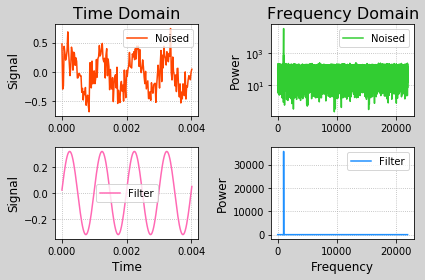

In [53]:
import numpy as np
import numpy.fft as nf
import scipy.io.wavfile as wf
import matplotlib.pyplot as mp
sample_rate, noised_sigs = wf.read(
    '../data/noised.wav')
noised_sigs = noised_sigs / 2 ** 15
times = np.arange(len(noised_sigs)) / sample_rate
freqs = nf.fftfreq(times.size, 1 / sample_rate)
noised_ffts = nf.fft(noised_sigs)
noised_pows = np.abs(noised_ffts)
fund_freq = np.abs(freqs[noised_pows.argmax()])
print(fund_freq)
noised_indices = np.where(np.abs(freqs) != fund_freq)
filter_ffts = noised_ffts.copy()
filter_ffts[noised_indices] = 0
filter_pows = np.abs(filter_ffts)
filter_sigs = nf.ifft(filter_ffts).real
wf.write('../data/filter.wav', sample_rate,
         (filter_sigs * 2 ** 15).astype(np.int16))
mp.figure('Filter', facecolor='lightgray')
mp.subplot(221)
mp.title('Time Domain', fontsize=16)
mp.ylabel('Signal', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(times[:178], noised_sigs[:178],
        c='orangered', label='Noised')
mp.legend()
mp.subplot(222)
mp.title('Frequency Domain', fontsize=16)
mp.ylabel('Power', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.semilogy(freqs[freqs >= 0],
            noised_pows[freqs >= 0], c='limegreen',
            label='Noised')
mp.legend()
mp.subplot(223)
mp.xlabel('Time', fontsize=12)
mp.ylabel('Signal', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(times[:178], filter_sigs[:178],
        c='hotpink', label='Filter')
mp.legend()
mp.subplot(224)
mp.xlabel('Frequency', fontsize=12)
mp.ylabel('Power', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(freqs[freqs >= 0], filter_pows[freqs >= 0],
        c='dodgerblue', label='Filter')
mp.legend()
mp.tight_layout()
mp.show()

## 随机数模块(random)

生成服从特定统计规律的随机数序列。

### 1. 二项分布

- `np.random.binomial(n, p, size)`

- 产生size个随机数，每个随机数来自n次尝试中的成功次数，其中每次尝试成功的概率为p。

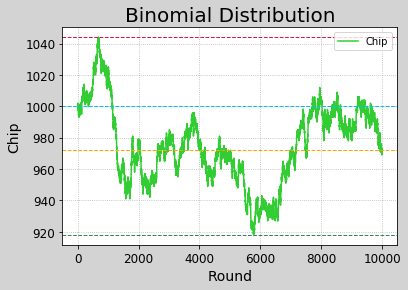

In [57]:
# 猜硬币游戏：初始筹码1000，每轮猜9次，猜对5次及5次以上为赢，筹码加1，否则为输，筹码减1，求10000轮的过程中手中筹码的变化。
# 代码：bi.py
import numpy as np
import matplotlib.pyplot as mp
outcomes = np.random.binomial(9, 0.5, 10000)
chips = [1000]
for outcome in outcomes:
    if outcome >= 5:
        chips.append(chips[-1] + 1)
    else:
        chips.append(chips[-1] - 1)
chips = np.array(chips)
mp.figure('Binomial Distribution',
          facecolor='lightgray')
mp.title('Binomial Distribution', fontsize=20)
mp.xlabel('Round', fontsize=14)
mp.ylabel('Chip', fontsize=14)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
o, h, l, c = 0, chips.argmax(), chips.argmin(), \
    chips.size - 1
if chips[o] < chips[c]:
    color = 'orangered'
elif chips[c] < chips[o]:
    color = 'limegreen'
else:
    color = 'dodgerblue'
mp.plot(chips, c=color, label='Chip')
mp.axhline(y=chips[o], linestyle='--',
           color='deepskyblue', linewidth=1)
mp.axhline(y=chips[h], linestyle='--',
           color='crimson', linewidth=1)
mp.axhline(y=chips[l], linestyle='--',
           color='seagreen', linewidth=1)
mp.axhline(y=chips[c], linestyle='--',
           color='orange', linewidth=1)
mp.legend()
mp.show()

### 2. 超几何分布

- `np.random.hypergeometric(ngood, nbad, nsample, size)`

- 产生size个随机数，每个随机数来自随机抽取nsample个样本中好样本的个数，总样本由ngood个好样本和nbad个坏样本组成

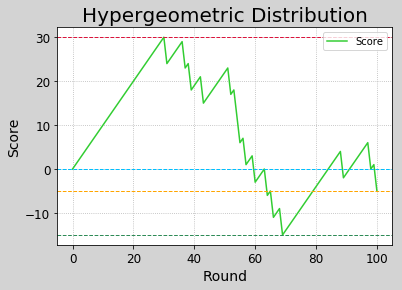

In [61]:
# 模球游戏：将25个好球和1个坏球放在一起，每次模3个球，全为好球加1分，只要摸到了坏球减6分，求100轮的过程中分值的变化。
# 代码：hyper.py
import numpy as np
import matplotlib.pyplot as mp

outcomes = np.random.hypergeometric(25, 1, 3, 100)
scores = [0]
for outcome in outcomes:
    if outcome == 3:
        scores.append(scores[-1] + 1)
    else:
        scores.append(scores[-1] - 6)
scores = np.array(scores)
mp.figure('Hypergeometric Distribution',
          facecolor='lightgray')
mp.title('Hypergeometric Distribution', fontsize=20)
mp.xlabel('Round', fontsize=14)
mp.ylabel('Score', fontsize=14)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
o, h, l, c = 0, scores.argmax(), scores.argmin(), \
    scores.size - 1
if scores[o] < scores[c]:
    color = 'orangered'
elif scores[c] < scores[o]:
    color = 'limegreen'
else:
    color = 'dodgerblue'
mp.plot(scores, c=color, label='Score')
mp.axhline(y=scores[o], linestyle='--',
           color='deepskyblue', linewidth=1)
mp.axhline(y=scores[h], linestyle='--',
           color='crimson', linewidth=1)
mp.axhline(y=scores[l], linestyle='--',
           color='seagreen', linewidth=1)
mp.axhline(y=scores[c], linestyle='--',
           color='orange', linewidth=1)
mp.legend()
mp.show()

### 3. 标准正态分布

- `np.random.norm(size)`

- `产生size个随机数，服从标准正态(平均值=0, 标准差=1)分布。

- 概率密度：$f(x) = \frac{{{e^{ - \frac{{{{(x - \mu )}^2}}}{{2{\sigma ^2}}}}}}}{{\sigma \sqrt {2\pi } }}$

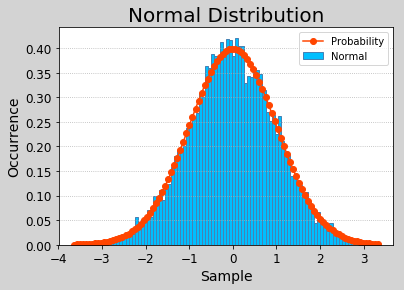

In [63]:
# norm.py
import numpy as np
import matplotlib.pyplot as mp

samples = np.random.normal(size=10000)
mp.figure('Normal Distribution', facecolor='lightgray')
mp.title('Normal Distribution', fontsize=20)
mp.xlabel('Sample', fontsize=14)
mp.ylabel('Occurrence', fontsize=14)
mp.tick_params(labelsize=12)
mp.grid(axis='y', linestyle=':')

bins = mp.hist(samples, 100, normed=True,
               edgecolor='steelblue',
               facecolor='deepskyblue',
               label='Normal')[1]

probs = np.exp(-bins ** 2 / 2) / np.sqrt(2 * np.pi)

mp.plot(bins, probs, 'o-', c='orangered',
        label='Probability')
mp.legend()
mp.show()

# 杂项

## 1. 排序

### 联合间接排序

- `numpy.lexsort((参考序列, 待排序列))` -> 有序索引
        [张三 李四 王五 赵六]
        [70   60    80    70]<-[30 20 30 20]
        
- `numpy.sort_complex(复数数组)`
    - 按照实部的升序排列，对于实部相同的元素，参考虚部的升序，直接返回排序后的结果数组。
- `numpy.searchsorted(有序序列, 待插序列)` ->**位置**数组
    - 表示将待插序列中的元素插入到有序序列中的哪些位置处，结果依然有序
- `numpy.insert(被插序列, 位置序列, 待插序列)` ->将待插序列中的元素
    - 按照位置序列中的位置，插入到被插序列中，返回插入后的结果

In [64]:
# sort.py
import numpy as np
ages = np.array([30, 20, 30, 20])
scores = np.array([70, 60, 80, 70])
names = np.array(['zhangsan', 'lisi', 'wangwu', 'zhaoliu'])
# 按照成绩的升序打印姓名，成绩相同的按照年龄的升序排列
print(np.take(names, np.lexsort((ages, scores))))

compleies = scores + ages * 1j
print(compleies)
sorted_compleies = np.sort_complex(compleies)
print(sorted_compleies)
#             0  1  2  3  4  5  6

a = np.array([1, 2, 4, 5, 6, 8, 9])
b = np.array([7, 3])
c = np.searchsorted(a, b)
print(c)
d = np.insert(a, c, b)
print(d)


['lisi' 'zhaoliu' 'zhangsan' 'wangwu']
[70.+30.j 60.+20.j 80.+30.j 70.+20.j]
[60.+20.j 70.+20.j 70.+30.j 80.+30.j]
[5 2]
[1 2 3 4 5 6 7 8 9]


## 2. 插值
    import scipy.interpolate as si
    si.interp1d(离散水平坐标, 离散垂直坐标, kind=插值算法(缺省为线性插值)) -> 插值器
    插值器(水平坐标)->垂直坐标

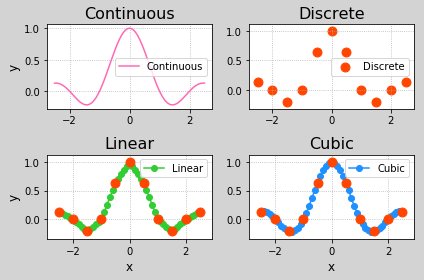

In [65]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as mp

min_x, max_x = -2.5, 2.5
con_x = np.linspace(min_x, max_x, 1001)
con_y = np.sinc(con_x)
dis_x = np.linspace(min_x, max_x, 11)
dis_y = np.sinc(dis_x)

# 线性插值
linear = si.interp1d(dis_x, dis_y)
lin_x = np.linspace(min_x, max_x, 51)
lin_y = linear(lin_x)

# 三次样条插值
cubic = si.interp1d(dis_x, dis_y, kind='cubic')
cub_x = np.linspace(min_x, max_x, 51)
cub_y = cubic(cub_x)


mp.figure('Interpolation', facecolor='lightgray')

mp.subplot(221)
mp.title('Continuous', fontsize=16)
mp.ylabel('y', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(con_x, con_y, c='hotpink',
        label='Continuous')
mp.legend()

mp.subplot(222)
mp.title('Discrete', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.scatter(dis_x, dis_y, c='orangered', s=80,
           label='Discrete')
mp.legend()

mp.subplot(223)
mp.title('Linear', fontsize=16)
mp.xlabel('x', fontsize=12)
mp.ylabel('y', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(lin_x, lin_y, 'o-', c='limegreen',
        label='Linear')
mp.scatter(dis_x, dis_y, c='orangered', s=80,
           zorder=3)
mp.legend()

mp.subplot(224)
mp.title('Cubic', fontsize=16)
mp.xlabel('x', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(cub_x, cub_y, 'o-', c='dodgerblue',
        label='Cubic')
mp.scatter(dis_x, dis_y, c='orangered', s=80,
           zorder=3)
mp.legend()


mp.tight_layout()
mp.show()

## 3. 积分
    import scipy.integrate as si
    si.quad(积分函数, 积分下限, 积分上限)->积分值, 最大误差

206.66666666666669
210.0


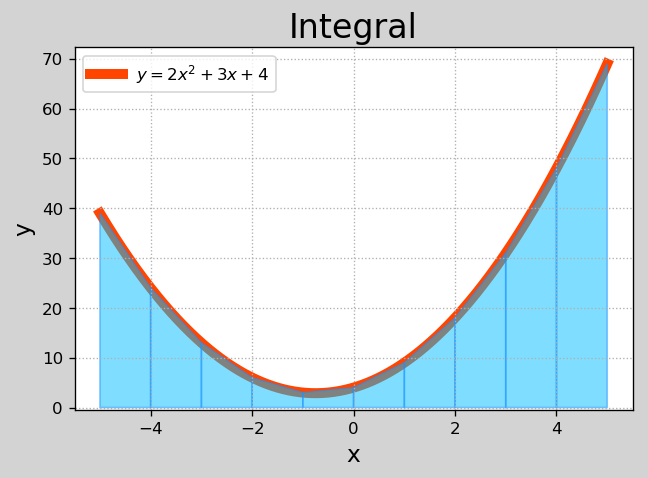

In [75]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as mp
import matplotlib.patches as mc

# 定义函数
def f(x):
    return 2 * x ** 2 + 3 * x + 4

# 确定x范围
a, b = -5, 5
x1 = np.linspace(a, b, 1001)
y1 = f(x1)

# 用scipy来计算积分
area = si.quad(f, a, b)[0]
print(area)

# 手动分割小梯形来计算面积，n越大，越接近真实值
n = 10
x2 = np.linspace(a, b, n + 1)
y2 = f(x2)
area = 0
for i in range(n):
    area += (y2[i] + y2[i + 1]) * (x2[i + 1] - x2[i]) / 2
print(area)

# 绘制函数图
mp.figure('Integral', dpi=120, facecolor='lightgray')
mp.title('Integral', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(x1, y1, c='orangered', linewidth=6,
        label=r'$y=2x^2+3x+4$', zorder=0)

for i in range(n):
    mp.gca().add_patch(mc.Polygon([
        [x2[i], 0], [x2[i], y2[i]],
        [x2[i + 1], y2[i + 1]], [x2[i + 1], 0]],
        fc='deepskyblue', ec='dodgerblue',
        alpha=0.5))
    
mp.legend()
mp.show()

## 4. 图像
    scipy.ndimage中提供了一些简单的图像处理，如高斯模糊、任意角度旋转、边缘识别等功能。

/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(517, 690) float32


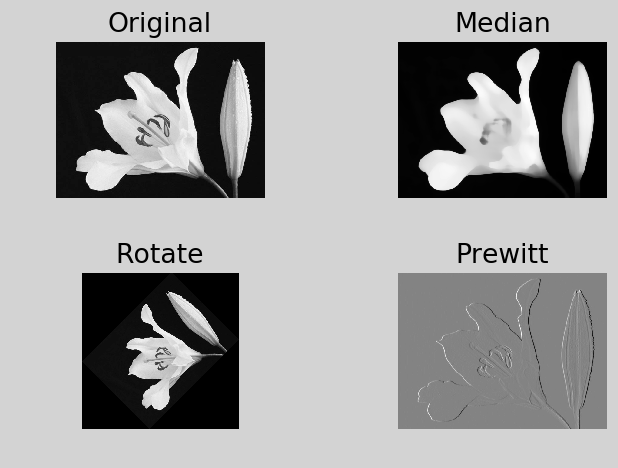

In [74]:
import numpy as np
import scipy.misc as sm # 杂项工具
import scipy.ndimage as sn
import matplotlib.pyplot as mp

original = sm.imread('../data/lily.jpg', True) # True就是黑白
print(original.shape, original.dtype)

median = sn.median_filter(original, (31, 31)) # 中值滤波，消除细节干扰、模糊化
rotate = sn.rotate(original, 45)
prewitt = sn.prewitt(original)

mp.figure('Image', dpi=120, facecolor='lightgray')

mp.subplot(221)
mp.title('Original', fontsize=16)
mp.axis('off')
mp.imshow(original, cmap='gray')

mp.subplot(222)
mp.title('Median', fontsize=16)
mp.axis('off')
mp.imshow(median, cmap='gray')

mp.subplot(223)
mp.title('Rotate', fontsize=16)
mp.axis('off')
mp.imshow(rotate, cmap='gray')

mp.subplot(224)
mp.title('Prewitt', fontsize=16)
mp.axis('off')
mp.imshow(prewitt, cmap='gray')


mp.tight_layout()
mp.show()

## 5. 金融

In [77]:
import numpy as np
# 终值 = fv(利率, 期数, 每期支付, 现值)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计多少钱？
fv = np.fv(0.01, 5, -100, -1000) # 凡是掏钱，都是负数
print(round(fv, 2))
# 现值 = pv(利率, 期数, 每期支付, 终值)
# 将多少钱以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计fv元？
pv = np.pv(0.01, 5, -100, fv)
print(pv)
# 净现值 = npv(利率, 现金流)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 相当于一次性存入多少钱？
npv = np.npv(0.01, [-1000, -100, -100, -100, -100, -100])
print(round(npv, 2))
fv = np.fv(0.01, 5, 0, npv)
print(round(fv, 2))
# 内部收益率 = irr(现金流)
# 将1000元存入银行5年，以后逐年提现100元、200元、
# 300元、400元、500元，银行利率达到多少，可在最后
# 一次提现后偿清全部本息，即净现值为0元？
irr = np.irr([-1000, 100, 200, 300, 400, 500])
print(round(irr, 2))
npv = np.npv(irr, [-1000, 100, 200, 300, 400, 500])
print(npv)

# 每期支付 = pmt(利率, 期数, 现值)
# 以1%的年利率从银行贷款1000元，分5年还清，
# 平均每年还多少钱？
pmt = np.pmt(0.01, 5, 1000)
print(round(pmt, 2))
# 期数 = nper(利率, 每期支付, 现值)
# 以1%的年利率从银行贷款1000元，平均每年还pmt元，
# 多少年还清？
nper = np.nper(0.01, pmt, 1000)
print(int(nper))
# 利率 = rate(期数, 每期支付, 现值, 终值)
# 从银行贷款1000元，平均每年还pmt元，nper年还清，
# 年利率多少？
rate = np.rate(nper, pmt, 1000, 0)
print(round(rate, 2))

1561.11
-1000.0
-1485.34
1561.11
0.12
0.0
-206.04
5
0.01
